# **Importing the Libraries**
---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

# **Visualize the Raw Data**
---

In [2]:
path = "D:\\PyCharm_Project\\Gas_Classification\\WTD_3\\Butanol_100\\L1\\201108080851_board_setPoint_400V_fan_setPoint_000_mfc_setPoint_Butanol_100ppm_p1"

In [9]:
def visualize_data(path):
    df = pd.read_table(path)
    data = df
    
    drop_list = [8,16,24,32,40,48,56,64]
    
    data1 = data.drop(data.columns[0:13], axis=1)
    
    for a in drop_list:
        data1 = data1.drop(data1.columns[a], axis=1)
    
    # Give column name
    data1.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','B1','B2','B3','B4','B5','B6','B7','B8','C1','C2','C3','C4','C5','C6','C7','C8','D1','D2','D3','D4','D5','D6','D7','D8','E1','E2','E3','E4','E5','E6','E7','E8','F1','F2','F3','F4','F5','F6','F7','F8','G1','G2','G3','G4','G5','G6','G7','G8','H1','H2','H3','H4','H5','H6','H7','H8','I1','I2','I3','I4','I5','I6','I7','I8']
    
    # Give index name
    abc = 0
    data1 = data1.rename(index = lambda abc:abc+1)
    
    x_list = list(df['0'])
    y_list = data1.to_numpy().tolist()
    
    uniform_data = data1[2200:18200]
    
    normalized_df=(data1-0)/(4096-0)
    uni_data = normalized_df.transpose()
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(uni_data, interpolation ='none', aspect = 'auto', cmap='viridis')
    fig.colorbar(im)
    
    plt.title("Heatmap of Chemical Sample", size=16)
    plt.tight_layout()
    plt.show()

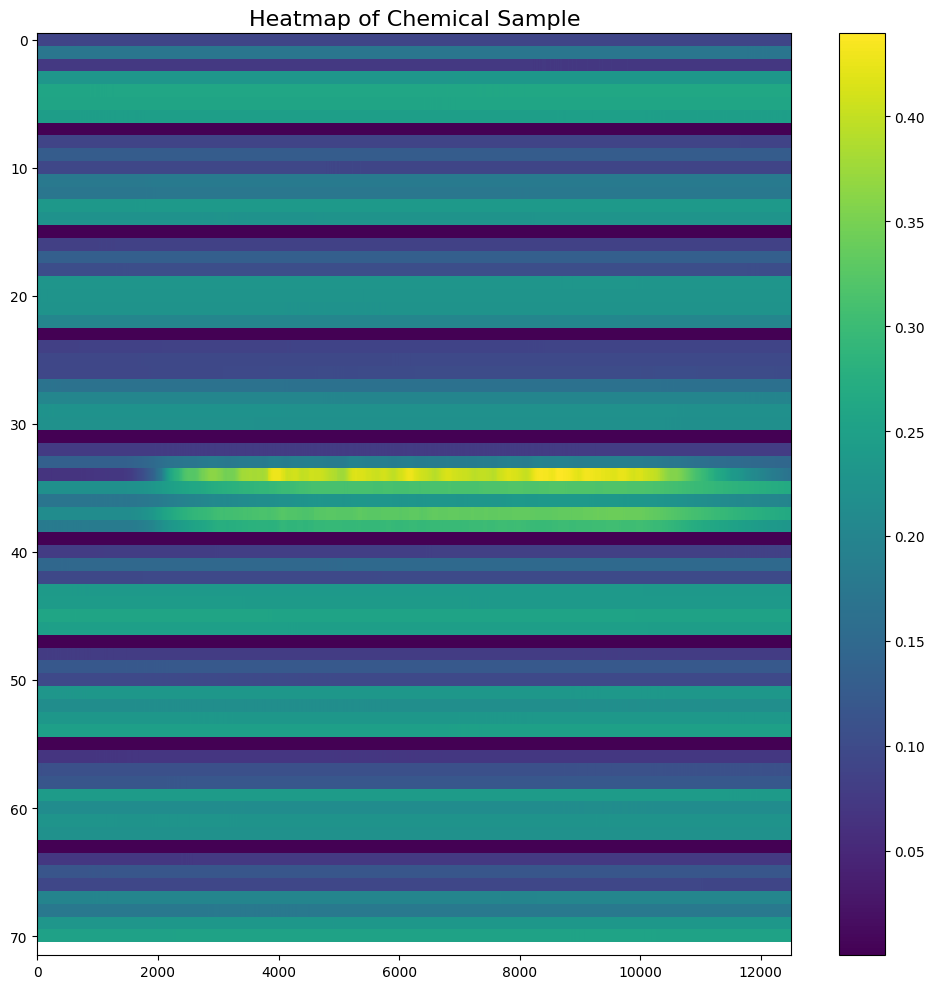

In [10]:
visualize_data(path)

# **Dataset Preprocesing**
---

In [11]:
def dataset_columns(path):
    drop_list = [9, 18, 27, 36, 45, 54, 63, 72, 81]
    columns_name = ['T', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
                'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
                'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',
                'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
                'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8',
                'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
                'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8']
    
    dtype = {str(i): float for i in range(100)}  # Assuming there are 100 columns
    df = pd.read_table(path, dtype=dtype)
    
    df = df.drop(df.columns[1:12], axis=1)
    df = df.drop(df.columns[drop_list], axis=1)
    df.columns = columns_name
    
    # Convert 'T' column to timedelta
    df['T'] = pd.to_timedelta(df['T'], unit='ms')
    
    # Filter 'T' values
    df = df[(df['T'] > pd.Timedelta(2000, unit='ms')) & (df['T'] < pd.Timedelta(200000, unit='ms'))]
    
    # Resample and fill NaN values
    df = df.set_index('T').resample('500ms').max().bfill()
    df = (df - 0) / (4096 - 0)

    new_df = df[df.columns].agg(['mean', 'std', 'min', 'max'])
    new_df = new_df.T.unstack().to_frame().T
    
    new_df.columns = new_df.columns.map('_'.join)
    new_df['Chemical'] = 'None'
    
    return new_df.columns

In [12]:
def dataset_preprocessing(path, c_name):
    drop_list = [9, 18, 27, 36, 45, 54, 63, 72, 81]
    columns_name = ['T', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
                'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
                'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',
                'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
                'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8',
                'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
                'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8']
    
    dtype = {str(i): float for i in range(100)}  # Assuming there are 100 columns
    df = pd.read_table(path, dtype=dtype)
    
    df = df.drop(df.columns[1:12], axis=1)
    df = df.drop(df.columns[drop_list], axis=1)
    df.columns = columns_name
    
    # Convert 'T' column to timedelta
    df['T'] = pd.to_timedelta(df['T'], unit='ms')
    
    # Filter 'T' values
    df = df[(df['T'] > pd.Timedelta(2000, unit='ms')) & (df['T'] < pd.Timedelta(200000, unit='ms'))]
    
    # Resample and fill NaN values
    df = df.set_index('T').resample('500ms').max().bfill()
    df = (df - 0) / (4096 - 0)

    new_df = df[df.columns].agg(['mean', 'std', 'min', 'max'])
    new_df = new_df.T.unstack().to_frame().T
    
    new_df.columns = new_df.columns.map('_'.join)
    new_df['Chemical'] = c_name
    
    new_df_array = new_df.to_numpy()
    
    return new_df_array

In [14]:
path = "D:\\PyCharm_Project\\Gas_Classification\\WTD_3\\Butanol_100\\L1\\201108080851_board_setPoint_400V_fan_setPoint_000_mfc_setPoint_Butanol_100ppm_p1"
dataset_columns = dataset_columns(path)
dataset_columns

Index(['mean_A1', 'mean_A2', 'mean_A3', 'mean_A4', 'mean_A5', 'mean_A6',
       'mean_A7', 'mean_A8', 'mean_B1', 'mean_B2',
       ...
       'max_H8', 'max_I1', 'max_I2', 'max_I3', 'max_I4', 'max_I5', 'max_I6',
       'max_I7', 'max_I8', 'Chemical'],
      dtype='object', length=289)

In [15]:
DIR_NAME = "D:\PyCharm_Project\Gas_Classification\WTD_3"
file_paths = []
dataset = np.array([])

# Count the total number of files
total_files = sum(len(files) for _, _, files in os.walk(DIR_NAME))

# Initialize tqdm outside the loop
progress_bar = tqdm(total=total_files)

# Locate the dataset directory
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
        # Extract the chemical absolute path 
        path = os.path.join(dirname, filename)
        # Extract the chemical name from the directory path
        chemical_name = os.path.basename(os.path.dirname(dirname))

        # print('path name:', path)
        # print('chemical_name:', chemical_name)

        new_data = dataset_preprocessing(path, chemical_name)
        if dataset.size == 0:
            dataset = new_data
        else:
            dataset = np.concatenate((dataset, new_data), axis=0)
            
        # Increment the progress bar
        progress_bar.update(1)
  
progress_bar.close()      
print('done')

100%|██████████| 5099/5099 [13:11<00:00,  6.44it/s]

done


In [16]:
dataset

array([[0.10691263218118686, 0.09232954545454546, 0.17256796480429293,
        ..., 0.233154296875, 0.254638671875, 'Butanol_100'],
       [0.11028312914299243, 0.10506554805871213, 0.1802731908933081,
        ..., 0.222412109375, 0.242919921875, 'Butanol_100'],
       [0.11351737590751262, 0.11865480981691919, 0.1882613981613005,
        ..., 0.212646484375, 0.232421875, 'Butanol_100'],
       ...,
       [0.09313101720328283, 0.10869991418087122, 0.1686105439157197,
        ..., 0.19091796875, 0.20849609375, 'Ethylene_500'],
       [0.09826968414614899, 0.12297659209280302, 0.17765607737531566,
        ..., 0.1806640625, 0.197998046875, 'Ethylene_500'],
       [0.10443053582702021, 0.13655907216698232, 0.18658077355587122,
        ..., 0.16796875, 0.18359375, 'Ethylene_500']], dtype=object)

In [17]:
new_df = pd.DataFrame(dataset)
new_df.columns = dataset_columns
new_df.tail()

,mean_A1,mean_A2,mean_A3,mean_A4,mean_A5,mean_A6,mean_A7,mean_A8,mean_B1,mean_B2,...,max_H8,max_I1,max_I2,max_I3,max_I4,max_I5,max_I6,max_I7,max_I8,Chemical
5094,0.084362,0.080605,0.150891,0.062405,0.203582,0.229006,0.236334,0.226164,0.061184,0.081297,...,0.20166,0.064209,0.06543,0.103027,0.082764,0.178711,0.155518,0.209717,0.228027,Ethylene_500
5095,0.089564,0.096641,0.161279,0.078532,0.199999,0.226376,0.227666,0.21874,0.066216,0.097912,...,0.195801,0.069092,0.080322,0.112061,0.099854,0.169922,0.147705,0.19873,0.218018,Ethylene_500
5096,0.093131,0.1087,0.168611,0.093427,0.190176,0.216259,0.218363,0.210594,0.070681,0.110738,...,0.184326,0.071045,0.087891,0.115479,0.110107,0.161377,0.140137,0.190918,0.208496,Ethylene_500
5097,0.09827,0.122977,0.177656,0.110084,0.179782,0.205086,0.207442,0.200751,0.075691,0.122332,...,0.174561,0.075195,0.099121,0.122559,0.130859,0.152344,0.132324,0.180664,0.197998,Ethylene_500
5098,0.104431,0.136559,0.186581,0.126359,0.170984,0.194931,0.197671,0.191718,0.083261,0.137538,...,0.163574,0.077393,0.105957,0.125732,0.14209,0.140869,0.122314,0.167969,0.183594,Ethylene_500


In [0]:
# new_df.to_csv('D:\\PyCharm_Project\\Gas_Classification\\output.csv')